COMPSCIX433.1-004 Data Science Principles and Practice Using Python
 <br>Professor Henry Tsai
 <br>Tammy Pui Ki Tam
 <br>November 3, 2020
 <br>
 <br>Final Project
 <br>google slide presentation: https://docs.google.com/presentation/d/1NKwEtEE-qIi9EqELPbmAFZFn4TblQGgwGg_P3sGxPO0/edit?usp=sharing

In this project, we are doing Credit Card Fraud Detection using the dataset obtained from Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains anonymized credit card transactions labeled as fraudulent or genuine.
<br>The dataset contains transactions made by credit cards in September 2013 by european cardholders. Due to confidentiality issues, the original features and more background information about the data were not provided. Features V1, V2, … V28 are the principal components obtained with PCA transformation. The features included as below:
-  Time  (number of seconds elapsed between this transaction and the first transaction in the dataset)
-  V1 - V28 (results of a PCA dimensionality reduction to protect user identities and sensitive features)
-  Amount (transaction amount)
-  Class (1 for fraud; 0 otherwise)

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
#load data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
data.shape

(284807, 33)

In [3]:
#take a look at all the column names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#take a look at the counts of each value in class (0 & 1)
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

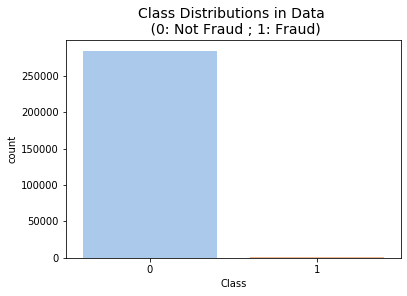

In [6]:
#plot a histogram for Class
fig = plt.figure(1)
pal = sns.color_palette("pastel")
sns.countplot('Class', data=data, palette=pal)
plt.title('Class Distributions in Data \n (0: Not Fraud ; 1: Fraud)', fontsize=14)
fig.savefig('Class_Distributions.png')

In [7]:
#print the percentage of the 2 classes in this dataset
print('Percentage of the 2 classes (Fraud & Not Frauds) in this dataset: ')
print('Frauds take up', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset.')
print('Not Frauds take up ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset.')

Percentage of the 2 classes (Fraud & Not Frauds) in this dataset: 
Frauds take up 0.17 % of the dataset.
Not Frauds take up  99.83 % of the dataset.


From above we can observe that this dataset is heavily unbalanced. We would need to create a new sub-dataset later to restore balance between the 2 classes, we will do so by keeping all 492 fraud cases, and randomly select the equal amount of non-fraud cases. 

In [8]:
#take a look at the details of column 'Time'
data.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

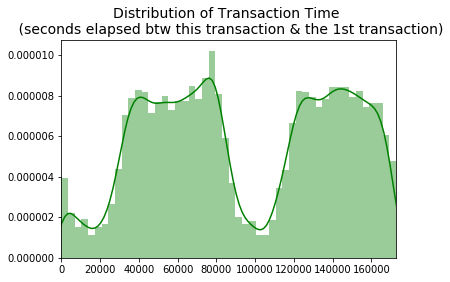

In [9]:
#take a look at the distribution of column 'Time'
fig = plt.figure(2)
sns.distplot(data['Time'].values, color='g')
plt.title('Distribution of Transaction Time \n (seconds elapsed btw this transaction & the 1st transaction)', fontsize=14)
plt.xlim([min(data['Time'].values), max(data['Time'].values)])
fig.savefig('Time_Distributions.png')

In [10]:
#take a look at the details of column 'Amount'
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

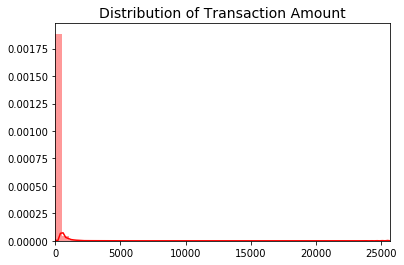

In [11]:
#take a look at the distribution of column 'Amount'
fig = plt.figure(3)
sns.distplot(data['Amount'].values, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([min(data['Amount'].values), max(data['Amount'].values)])
fig.savefig('Amount_Distributions.png')

Since both the column "Amount" and "Time" are pretty skewed, we would need to perform scaling on these 2 columns. However, since the V features (V1 - V28) are already the results of a PCA dimensionality reduction, no further scaling would be needed for those columns. 

In [12]:
#import RobustScaler (it is less prone to outliers over StandardScaler)
from sklearn.preprocessing import RobustScaler

In [13]:
#Scale column 'Amount'
data['normAmount'] = RobustScaler().fit_transform(data['Amount'].values.reshape(-1,1))
#Scale column 'Time'
data['normTime'] = RobustScaler().fit_transform(data['Time'].values.reshape(-1,1))

In [14]:
#make a deep copy of data
normData = data.copy()

#drop the orginal columns of 'Time' and 'Amount' (not scaled)
normData = normData.drop(['Time','Amount'],axis=1)
normData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [15]:
#do random under-sampling to create a balanced dataset between class 0 (non-fraud cases) and class 1 (fraud cases)
#this would prefer our model from overfitting

#pick all fraud cases out from the normed dataset
fraud_normData = normData.loc[normData['Class'] == 1]

#pick all non-fraud cases out from the normed dataset
non_fraud_normAll = normData.loc[normData['Class'] == 0]
#shuffle the non_fraud_normAll data
non_fraud_normAll = non_fraud_normAll.sample(frac=1)
#Select 492 non-fraud cases out from the shuffled normed dataset (matching the total number of fraud cases)
non_fraud_normData = non_fraud_normAll[non_fraud_normAll['Class'] == 0][:492]

#concatenate all the 492 fraud cases and the randomly selected 492 non-fraud cases together
df = pd.concat([fraud_normData,non_fraud_normData])
#shuffle the dataset df
df = df.sample(frac=1, random_state=33)

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
190368,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,-1.297262,-5.487425,...,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,1,2.150493,0.518227
141258,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1,-0.307413,-0.005733
47397,1.188807,0.262403,0.636080,0.642157,-0.380166,-0.688461,0.052860,-0.137018,-0.110118,-0.136707,...,-0.501887,0.193459,0.418395,0.128663,0.100865,-0.007171,0.021281,0,-0.239363,-0.487470
160959,0.356321,0.462031,-0.177094,-1.002129,1.027603,-0.229001,0.905644,-0.140224,0.312733,-0.312168,...,0.914018,-0.342371,0.158501,0.076018,-0.535742,-0.134900,-0.236981,0,-0.293440,0.341369
282953,-0.777275,1.436889,-0.393049,-0.860198,0.283588,-0.584096,0.581203,0.392342,-0.171596,0.119194,...,-0.494706,0.100325,-0.392605,-0.338742,0.156468,0.343712,0.138736,0,-0.167819,1.017141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203883,1.937052,-0.097670,-0.472148,1.440382,-0.009910,0.227603,-0.235530,0.037223,1.026323,-0.055096,...,-1.188376,0.449629,0.543476,-0.266894,-1.132043,0.058318,-0.022162,0,-0.140152,0.591208
232339,1.863924,-0.256449,0.125152,1.369929,-0.698140,-0.187693,-0.591399,-0.027445,0.974456,0.089164,...,0.390988,0.209130,-0.114650,-0.286646,-0.756538,0.080121,-0.011653,0,0.321386,0.733585
193550,1.747360,-0.701734,-1.850858,0.037861,0.311775,-0.258112,0.273568,-0.185371,0.126847,0.246718,...,0.610399,-0.153457,0.283453,0.058330,0.746822,-0.131719,-0.047509,0,2.239363,0.534405
204079,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,-0.989431,...,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1,1.208831,0.592230


In [16]:
df.shape

(984, 31)

The final dataset for running model has 984 rows, and 31 columns.

In [17]:
#take a look at the counts of each value in class (0 & 1) in this new dataset
df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

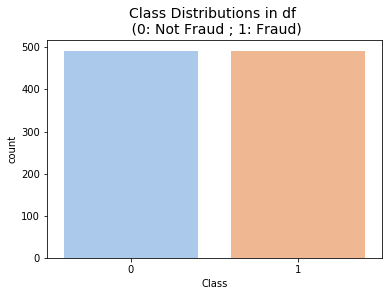

In [18]:
#plot a histogram for Class in this new dataset
fig = plt.figure(4)
pal = sns.color_palette("pastel")
sns.countplot('Class', data=df, palette=pal)
plt.title('Class Distributions in df \n (0: Not Fraud ; 1: Fraud)', fontsize=14)
fig.savefig('Class_Distributions_df.png')

In [19]:
#print the percentage of the 2 classes in this dataset
print('Percentage of the 2 classes (Fraud & Not Frauds) in the final dataset "df": ')
print('Frauds take up', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the final dataset "df".')
print('Not Frauds take up ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the final dataset "df".')

Percentage of the 2 classes (Fraud & Not Frauds) in the final dataset "df": 
Frauds take up 50.0 % of the final dataset "df".
Not Frauds take up  50.0 % of the final dataset "df".


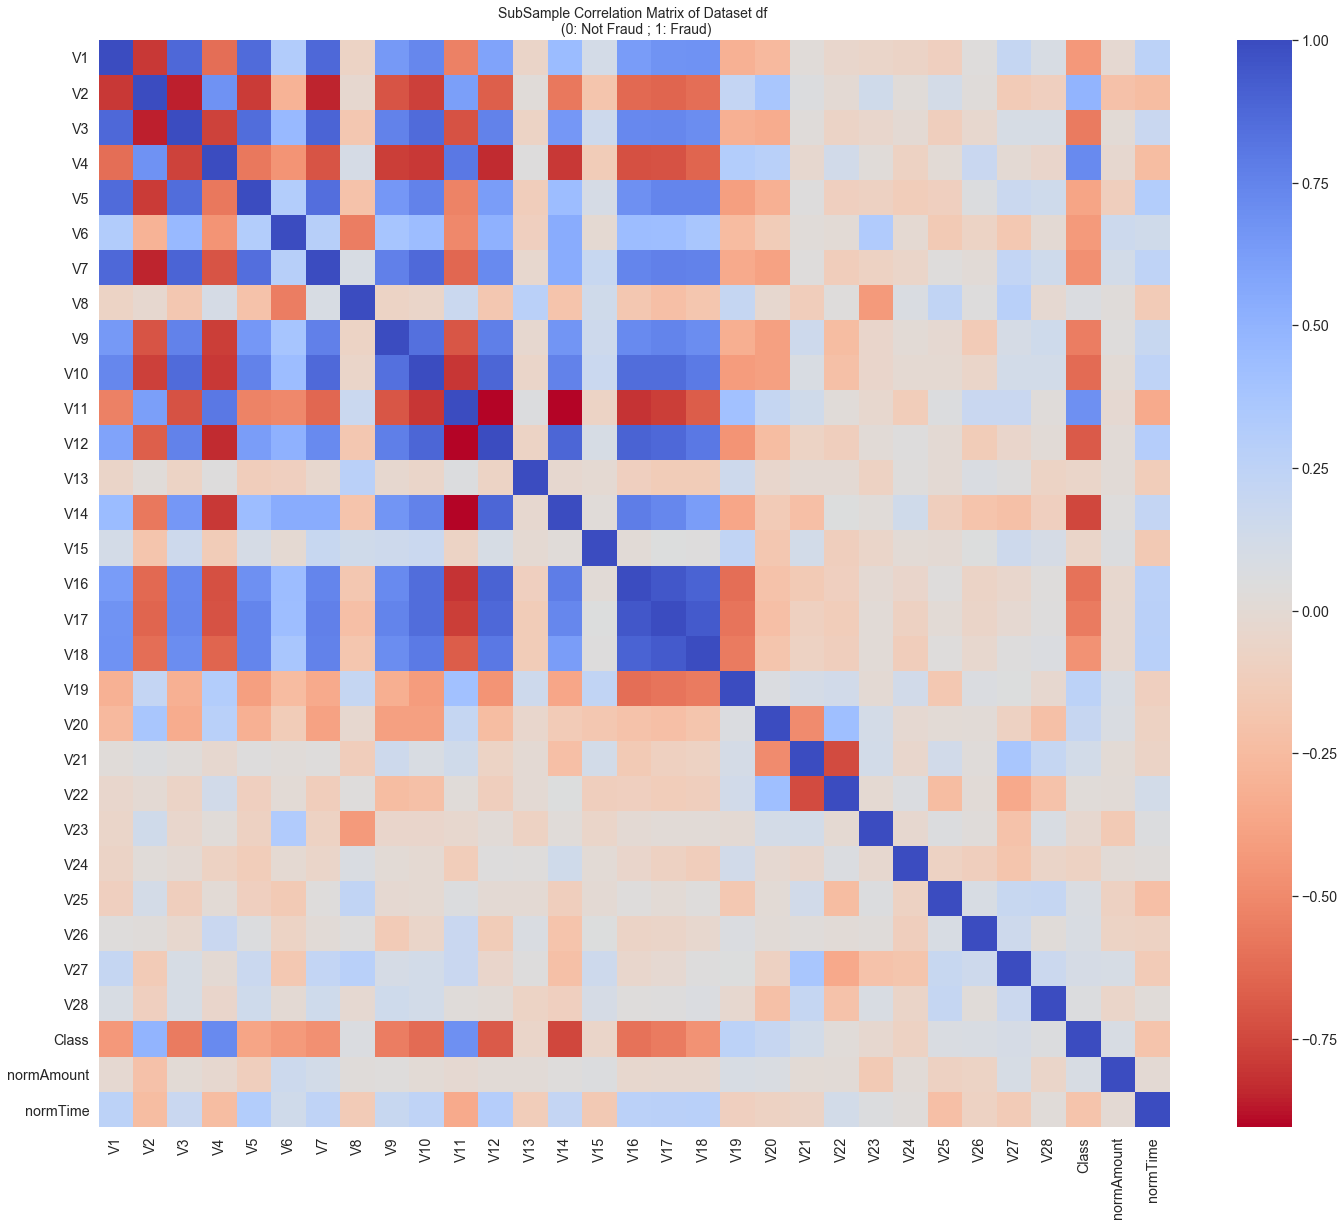

In [36]:
#using Seaborn heatmap to observe the correlation of the features and the target variable, 'Class'
plt.figure(figsize=(24,20))
sns.heatmap (df.corr(), cmap='coolwarm_r', annot_kws = {'size': 20})
plt.title('SubSample Correlation Matrix of Dataset df \n (0: Not Fraud ; 1: Fraud)', fontsize=14)
plt.show()
fig.savefig('Corr_Matrix_df.png')

In [21]:
#selecting the correlation coefficients between 'Class' and each of the features
correlation_df = df.corr()
r = pd.DataFrame(correlation_df.iloc[-3, :])
r = r.rename({"Class":"R to Class"}, axis='columns')
r

,R to Class
V1,-0.435939
V2,0.496534
V3,-0.562425
V4,0.722234
V5,-0.374161
V6,-0.423958
V7,-0.473347
V8,0.063523
V9,-0.551588
V10,-0.629562


In [22]:
#Coverting R values to Absolute R values; then re-arrange them in descending order
abs_r = pd.DataFrame([r['R to Class'].abs()])
abs_r = abs_r.T
abs_r = abs_r.rename({"R to Class":"Absolute R to Class"}, axis='columns')
absolute_r = pd.concat([abs_r, r['R to Class']], axis=1)
absolute_r_DESC = absolute_r.sort_values('Absolute R to Class',ascending=False)
print(absolute_r_DESC)

            Absolute R to Class  R to Class
Class                  1.000000    1.000000
V14                    0.749010   -0.749010
V4                     0.722234    0.722234
V11                    0.692877    0.692877
V12                    0.683950   -0.683950
V10                    0.629562   -0.629562
V16                    0.595413   -0.595413
V3                     0.562425   -0.562425
V17                    0.558324   -0.558324
V9                     0.551588   -0.551588
V2                     0.496534    0.496534
V7                     0.473347   -0.473347
V18                    0.464969   -0.464969
V1                     0.435939   -0.435939
V6                     0.423958   -0.423958
V5                     0.374161   -0.374161
V19                    0.259694    0.259694
normTime               0.196501   -0.196501
V20                    0.196392    0.196392
V21                    0.128447    0.128447
V27                    0.103014    0.103014
normAmount             0.087592 

In [23]:
#make X and Y

#whole dataset normData
X = normData.iloc[:, normData.columns != 'Class']
y = normData.iloc[:, normData.columns == 'Class']

#undersampled dataset df
X_df = df.iloc[:, df.columns != 'Class']
y_df = df.iloc[:, df.columns == 'Class']

In [24]:
# split data into train and test set

from sklearn.model_selection import train_test_split

# Whole dataset normData
originalX_train, originalX_test, originaly_train, originaly_test = train_test_split(X,y,test_size = 0.2, random_state = 333)

#undersampled dataset df
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df,y_df,test_size = 0.2, random_state = 333)

In [25]:
print('For the Whole Original Dataset:')
print("Number transactions train dataset: ", len(originalX_train))
print("Number transactions test dataset: ", len(originalX_test))
print("Total number of transactions: ", len(originalX_train)+len(originalX_test))
print('\n')
print('For the Undersampled Dataset for Modeling:')
print("Number transactions train dataset: ", len(X_train_df))
print("Number transactions test dataset: ", len(X_test_df))
print("Total number of transactions: ", len(X_train_df)+len(X_test_df))

For the Whole Original Dataset:
Number transactions train dataset:  227845
Number transactions test dataset:  56962
Total number of transactions:  284807


For the Undersampled Dataset for Modeling:
Number transactions train dataset:  787
Number transactions test dataset:  197
Total number of transactions:  984


In [26]:
# Turn the values into an array
originalX_train = originalX_train.values
originalX_test = originalX_test.values
originaly_train = originaly_train.values
originaly_test = originaly_test.values

In [27]:
#import more packages for Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error,precision_score, recall_score, auc,roc_curve

In [28]:
# Turn into an array
X_train_df = X_train_df.values
X_test_df = X_test_df.values
y_train_df = y_train_df.values
y_test_df = y_test_df.values

In [29]:
Models = [
    sklearn.linear_model.LogisticRegressionCV(),
    sklearn.neighbors.KNeighborsClassifier(),
    sklearn.svm.SVC(probability=True),
    sklearn.tree.DecisionTreeClassifier(),
    sklearn.naive_bayes.GaussianNB(),
    sklearn.ensemble.RandomForestClassifier(),
    sklearn.linear_model.SGDClassifier()
]

In [30]:
Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for model in Models:
    
    
    predicted = model.fit(X_train_df, y_train_df).predict(X_test_df)
    fp, tp, th = roc_curve(y_test_df, predicted)
    Model_name = model.__class__.__name__
    Model_compare.loc[row_index,'Model Name'] = Model_name
    Model_compare.loc[row_index, 'Model Train Accuracy'] = round(model.score(X_train_df, y_train_df), 4)
    Model_compare.loc[row_index, 'Model Test Accuracy'] = round(model.score(X_test_df, y_test_df), 4)
    Model_compare.loc[row_index, 'Model Precission'] = precision_score(y_test_df, predicted)
    Model_compare.loc[row_index, 'Model Recall'] = recall_score(y_test_df, predicted)
    Model_compare.loc[row_index, 'Model AUC'] = auc(fp, tp)

    row_index+=1
    
Model_compare.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)    
Model_compare

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precission,Model Recall,Model AUC
5,RandomForestClassifier,1.0000,0.9594,0.989474,0.930693,0.960138
0,LogisticRegressionCV,0.9543,0.9492,1.000000,0.900990,0.950495
1,KNeighborsClassifier,0.9517,0.9391,0.968421,0.910891,0.939821
6,SGDClassifier,0.9543,0.9391,0.958763,0.920792,0.939563
2,SVC,0.9479,0.9289,1.000000,0.861386,0.930693
4,GaussianNB,0.9161,0.9036,0.965909,0.841584,0.905167
3,DecisionTreeClassifier,1.0000,0.8934,0.908163,0.881188,0.893719


In [31]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_df, y_train_df)
# logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_df, y_train_df)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_df, y_train_df)

# SVC best estimator
svc = grid_svc.best_estimator_

# RandomForest Classifier
RF_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_RF = GridSearchCV(RandomForestClassifier(), RF_params)
grid_RF.fit(X_train_df, y_train_df)

# tree best estimator
RF_clf = grid_RF.best_estimator_


C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tammy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tammy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was ex

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tammy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [32]:
print(log_reg, '\n')
print(knears_neighbors, '\n')
print(svc, '\n')
print(RF_clf, '\n')

LogisticRegression(C=0.01) 

KNeighborsClassifier(n_neighbors=3) 

SVC(C=1) 

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5) 



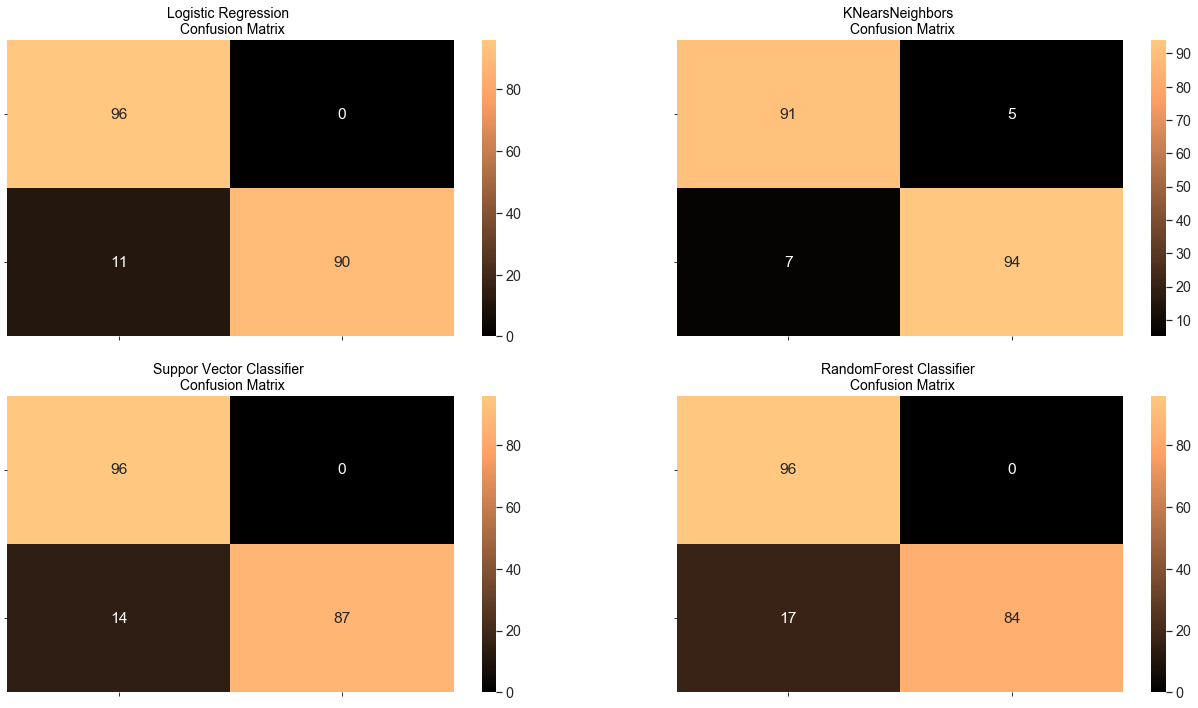

In [33]:
# fit Logistic Regression fitted using Best estimator with UnderSampling
y_pred_log_reg = log_reg.predict(X_test_df)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test_df)
y_pred_svc = svc.predict(X_test_df)
y_pred_RF = RF_clf.predict(X_test_df)


log_reg_cf = confusion_matrix(y_test_df, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test_df, y_pred_knear)
svc_cf = confusion_matrix(y_test_df, y_pred_svc)
RF_cf = confusion_matrix(y_test_df, y_pred_RF)


fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.set(font_scale=1.3)

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(RF_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("RandomForest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()
fig.savefig('Confusion_Matrix_4models.png')

In [34]:
print('Logistic Regression:')
print(classification_report(y_test_df, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test_df, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test_df, y_pred_svc))

print('Random Forest Classifier:')
print(classification_report(y_test_df, y_pred_RF))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        96
           1       1.00      0.89      0.94       101

    accuracy                           0.94       197
   macro avg       0.95      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        96
           1       0.95      0.93      0.94       101

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        96
           1       1.00      0.86      0.93       101

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted

All the above 4 models got an accuracy score of 91% or higher. Among the above 4 models, all but 1 model (Logistic Regression, Support Vector Classifier, and Random Forest Classifier)  achieved 100% precision rate on correctly classifying fraud cases).
<br> Since we are performing credit card fraud detection here, it is better to have some False Positives and NO False Negatives, rather than some (even if it's a low number) False Negatives and some/no False Positives. 
<br> The best model from the above 4 that can achieve our objectives the best is Logistic Regression, with an accuracy at 94%, NO False Negatives, and the lowest number of False Positives cases, compares to the other two models that also have no false negatives cases.  

EXTRA

In [35]:
#for comparison
#test to see if we use the normed unbalanced data from dataset normData, what accuracy and precision rates would it be at

# fit Logistic Regression fitted using Best estimator with UnderSampling
y_pred_log_reg = log_reg.predict(originalX_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(originalX_test)
y_pred_svc = svc.predict(originalX_test)
y_pred_RF = RF_clf.predict(originalX_test)

print('Logistic Regression using:')
print(classification_report(originaly_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(originaly_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(originaly_test, y_pred_svc))

print('Random Forest Classifier:')
print(classification_report(originaly_test, y_pred_RF))

Logistic Regression using:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.09      0.90      0.16        94

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56868
           1       0.04      0.91      0.07        94

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.08      0.90      0.14        94

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
we